In [1]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# File to Load (Remember to Change These)
AAPL_ticker = Path("Stock_data/AAPL.csv")
AAPL_stock = pd.read_csv(AAPL_ticker)
AAPL_stock["Ticker"]= "AAPL"

AMZN_ticker = Path("Stock_data/AMZN.csv")
AMZN_stock = pd.read_csv(AMZN_ticker)
AMZN_stock["Ticker"]= "AMZN"

CSCO_ticker = Path("Stock_data/CSCO.csv")
CSCO_stock = pd.read_csv(CSCO_ticker)
CSCO_stock["Ticker"]= "CSCO"


EBAY_ticker = Path("Stock_data/EBAY.csv")
EBAY_stock = pd.read_csv(EBAY_ticker)
EBAY_stock["Ticker"]= "EBAY"

GOOG_ticker = Path("Stock_data/GOOG.csv")
GOOG_stock = pd.read_csv(GOOG_ticker)
GOOG_stock["Ticker"]= "GOOG"

IBM_ticker = Path("Stock_data/IBM.csv")
IBM_stock = pd.read_csv(IBM_ticker)
IBM_stock["Ticker"]= "IBM"

MSFT_ticker = Path("Stock_data/MSFT.csv")
MSFT_stock = pd.read_csv(MSFT_ticker)
MSFT_stock["Ticker"]= "MSFT"

NVDA_ticker = Path("Stock_data/NVDA.csv")
NVDA_stock = pd.read_csv(NVDA_ticker)
NVDA_stock["Ticker"]= "NVDA"

T_ticker = Path("Stock_data/T.csv")
T_stock = pd.read_csv(T_ticker)
T_stock["Ticker"]= "T"


TSLA_ticker = Path("Stock_data/TSLA.csv")
TSLA_stock = pd.read_csv(TSLA_ticker)
TSLA_stock["Ticker"]= "TSLA"

# student_data= Path("Resources/students_complete.csv")

In [3]:
#Combining all the Ticker data into a single DataFrame
stock_combined_df = pd.concat([AAPL_stock,AMZN_stock,CSCO_stock,EBAY_stock,GOOG_stock,IBM_stock,MSFT_stock,NVDA_stock,T_stock,TSLA_stock],ignore_index=True)

In [4]:
data1=stock_combined_df.copy()
data1


,Date,Low,Open,Volume,High,Close,Adjusted Close,Ticker
0,12-12-1980,0.128348,0.128348,469033600,0.128906,0.128348,0.099874,AAPL
1,15-12-1980,0.121652,0.122210,175884800,0.122210,0.121652,0.094663,AAPL
2,16-12-1980,0.112723,0.113281,105728000,0.113281,0.112723,0.087715,AAPL
3,17-12-1980,0.115513,0.115513,86441600,0.116071,0.115513,0.089886,AAPL
4,18-12-1980,0.118862,0.118862,73449600,0.119420,0.118862,0.092492,AAPL
...,...,...,...,...,...,...,...,...
77615,06-12-2022,175.330002,181.220001,92150800,183.649994,179.820007,179.820007,TSLA
77616,07-12-2022,172.220001,175.029999,84213300,179.380005,174.039993,174.039993,TSLA
77617,08-12-2022,169.059998,172.199997,97624500,175.199997,173.440002,173.440002,TSLA
77618,09-12-2022,173.360001,173.839996,104746600,182.500000,179.050003,179.050003,TSLA


In [5]:
data1['Date']=pd.to_datetime(data1['Date'])

C:\Users\mm_xx\AppData\Local\Temp\ipykernel_2276\828067985.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data1['Date']=pd.to_datetime(data1['Date'])


In [6]:
data1['Year']=data1['Date'].dt.year

In [7]:
data1['Month']=data1['Date'].dt.strftime('%B')

<Axes: xlabel='Month'>

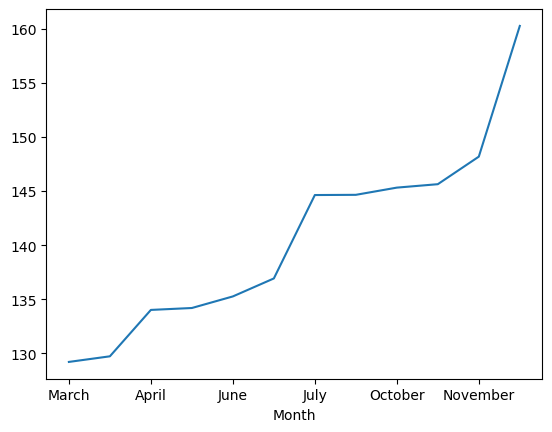

In [8]:
data1[(data1['Ticker'] == "AAPL") & (data1['Year'] == 2021)].groupby(['Month'])['Close'].mean().sort_values().plot()

In [9]:
data1.head()

,Date,Low,Open,Volume,High,Close,Adjusted Close,Ticker,Year,Month
0,1980-12-12,0.128348,0.128348,469033600,0.128906,0.128348,0.099874,AAPL,1980,December
1,1980-12-15,0.121652,0.122210,175884800,0.122210,0.121652,0.094663,AAPL,1980,December
2,1980-12-16,0.112723,0.113281,105728000,0.113281,0.112723,0.087715,AAPL,1980,December
3,1980-12-17,0.115513,0.115513,86441600,0.116071,0.115513,0.089886,AAPL,1980,December
4,1980-12-18,0.118862,0.118862,73449600,0.119420,0.118862,0.092492,AAPL,1980,December


In [10]:
data1.Ticker.unique()

array(['AAPL', 'AMZN', 'CSCO', 'EBAY', 'GOOG', 'IBM', 'MSFT', 'NVDA', 'T',
       'TSLA'], dtype=object)

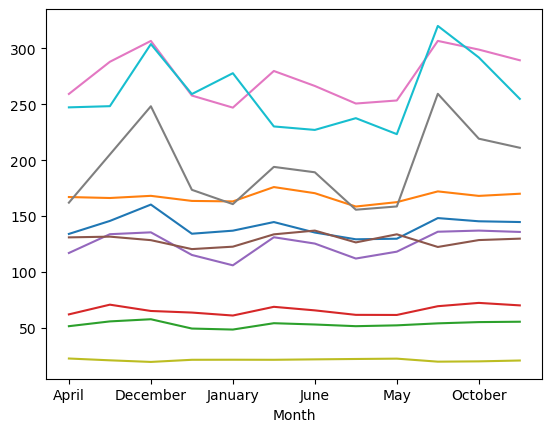

In [11]:
for i in data1.Ticker.unique():
    data1[(data1.Ticker==i)&(data1.Year==2021)].groupby(['Month'])['Close'].mean().plot()
    

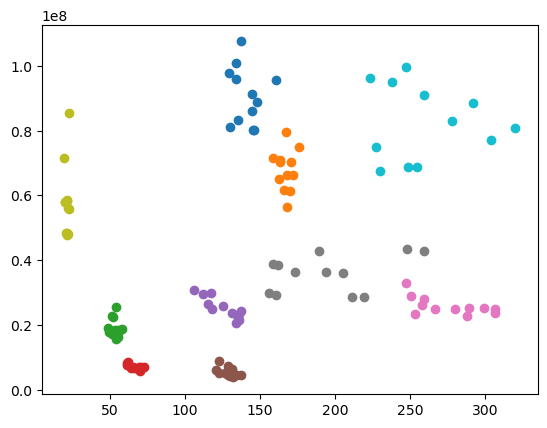

In [12]:
for i in data1.Ticker.unique():
    plt.scatter(x=data1[(data1.Ticker==i)&(data1.Year==2021)].groupby(['Month'])['Close'].mean(),
                y=data1[(data1.Ticker==i)&(data1.Year==2021)].groupby(['Month'])['Volume'].mean())

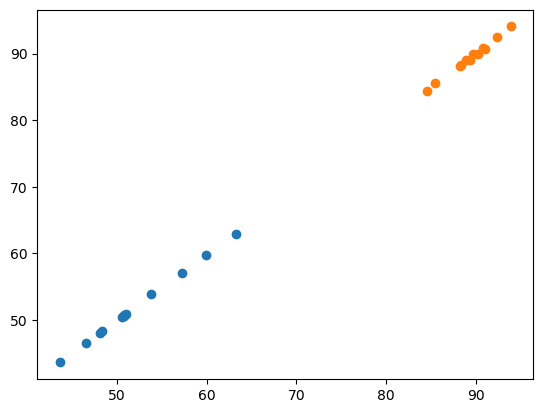

In [13]:
plt.scatter(x=data1[(data1.Ticker=="AAPL")&(data1.Year==2019)].groupby(['Month'])['Close'].mean(),
                y=data1[(data1.Ticker=="AAPL")&(data1.Year==2019)].groupby(['Month'])['Open'].mean())
    
plt.scatter(x=data1[(data1.Ticker=="AMZN")&(data1.Year==2019)].groupby(['Month'])['Close'].mean(),
                y=data1[(data1.Ticker=="AMZN")&(data1.Year==2019)].groupby(['Month'])['Open'].mean())

y = -1.13x + 170.66
-0.4580926996775942


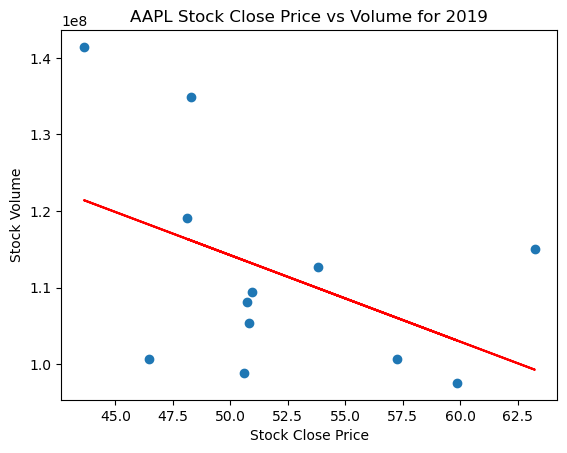

In [43]:
   plt.scatter(x=data1[(data1.Ticker=="AAPL")&(data1.Year==2019)].groupby(['Month'])['Close'].mean(),
                y=data1[(data1.Ticker=="AAPL")&(data1.Year==2019)].groupby(['Month'])['Volume'].mean())
from scipy.stats import linregress


x=data1[(data1.Ticker=="AAPL")&(data1.Year==2019)].groupby(['Month'])['Close'].mean()
y=data1[(data1.Ticker=="AAPL")&(data1.Year==2019)].groupby(['Month'])['Volume'].mean()


(slope,intercept, rvalue, pvalue, stderr)=linregress(x, y)
regress_values= x*slope+intercept
line_eq = "y = " + str(round(slope/1000000,2)) + "x + " + str(round(intercept/1000000,2))
plt.plot(x,regress_values, color='red')
plt.xlabel("Stock Close Price")
plt.ylabel("Stock Volume")
plt.title("AAPL Stock Close Price vs Volume for 2019")


plt.annotate(line_eq, (55,1.35),fontsize = 10, color="red")

print(line_eq)

print(rvalue) 

<Axes: xlabel='Month'>

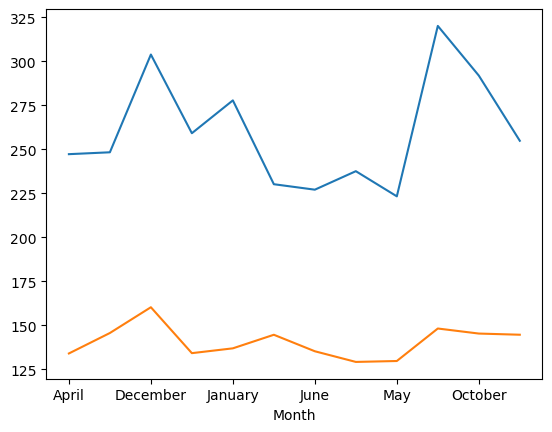

In [15]:
data1[(data1.Ticker=='TSLA')&(data1.Year==2021)].groupby(['Month'])['Close'].mean().plot()
data1[(data1.Ticker=='AAPL')&(data1.Year==2021)].groupby(['Month'])['Close'].mean().plot()

In [16]:
#Checking for NAs
stock_combined_df.isna().sum()

Date              0
Low               0
Open              0
Volume            0
High              0
Close             0
Adjusted Close    0
Ticker            0
dtype: int64

In [17]:
#Filtering the data based on the 10 year period
stock_combined_df['Date'] = pd.to_datetime(stock_combined_df['Date'], format='%d-%m-%Y')
start_date = '2010-01-01'
end_date = '2021-12-31'

stocks_filtered_df = stock_combined_df[(stock_combined_df['Date'] >= start_date) & (stock_combined_df['Date'] <= end_date)]

In [18]:
stocks_filtered_df.head(1)

,Date,Low,Open,Volume,High,Close,Adjusted Close,Ticker
7331,2010-01-04,7.585,7.6225,493729600,7.660714,7.643214,6.515212,AAPL


In [19]:
# Extract the year from the 'Date' column and store it in a new column 'Year'
stocks_filtered_df['Year'] = stocks_filtered_df['Date'].dt.year

# Group the DataFrame by 'Ticker' and 'Year' and calculate the mean of the 'Close' column for each group
average_close_by_ticker_year = stocks_filtered_df.groupby(['Ticker', 'Year'])['Close'].mean()

# Reset the index to make 'Ticker' and 'Year' regular columns
average_close_by_ticker_year = average_close_by_ticker_year.reset_index()

# Rename the columns for clarity
average_close_by_ticker_year.columns = ['Ticker', 'Year', 'Average_Close']

# Display the resulting DataFrame
average_close_by_ticker_year


C:\Users\mm_xx\AppData\Local\Temp\ipykernel_2276\456655445.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks_filtered_df['Year'] = stocks_filtered_df['Date'].dt.year


,Ticker,Year,Average_Close
0,AAPL,2010,9.280088
1,AAPL,2011,13.000154
2,AAPL,2012,20.573204
3,AAPL,2013,16.879817
4,AAPL,2014,23.066164
...,...,...,...
115,TSLA,2017,20.954420
116,TSLA,2018,21.153995
117,TSLA,2019,18.235347
118,TSLA,2020,96.665689


In [20]:
# Extract the year from the 'Date' column and store it in a new column 'Year'
stocks_filtered_df['Year'] = stocks_filtered_df['Date'].dt.year

# Group the DataFrame by 'Ticker' and 'Year' and calculate the mean of the 'Close' column for each group
median_close_by_ticker_year = stocks_filtered_df.groupby(['Ticker', 'Year'])['Close'].median()

# Reset the index to make 'Ticker' and 'Year' regular columns
median_close_by_ticker_year = median_close_by_ticker_year.reset_index()

# Rename the columns for clarity
median_close_by_ticker_year.columns = ['Ticker', 'Year', 'Median_Close']

# Display the resulting DataFrame
median_close_by_ticker_year

C:\Users\mm_xx\AppData\Local\Temp\ipykernel_2276\2401310653.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks_filtered_df['Year'] = stocks_filtered_df['Date'].dt.year


,Ticker,Year,Median_Close
0,AAPL,2010,9.180893
1,AAPL,2011,12.750893
2,AAPL,2012,20.803214
3,AAPL,2013,16.466965
4,AAPL,2014,23.475000
...,...,...,...
115,TSLA,2017,21.170000
116,TSLA,2018,21.257999
117,TSLA,2019,17.353001
118,TSLA,2020,80.577332


In [21]:
# Extract the year from the 'Date' column and store it in a new column 'Year'
stocks_filtered_df['Year'] = stocks_filtered_df['Date'].dt.year

# Group the DataFrame by 'Ticker' and 'Year' and calculate the mean of the 'Close' column for each group
var_close_by_ticker_year = stocks_filtered_df.groupby(['Ticker', 'Year'])['Close'].var()

# Reset the index to make 'Ticker' and 'Year' regular columns
var_close_by_ticker_year = var_close_by_ticker_year.reset_index()

# Rename the columns for clarity
var_close_by_ticker_year.columns = ['Ticker', 'Year', 'Variance_Close']

# Display the resulting DataFrame
var_close_by_ticker_year

C:\Users\mm_xx\AppData\Local\Temp\ipykernel_2276\3405814854.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks_filtered_df['Year'] = stocks_filtered_df['Date'].dt.year


,Ticker,Year,Variance_Close
0,AAPL,2010,1.799091
1,AAPL,2011,0.857201
2,AAPL,2012,5.721816
3,AAPL,2013,2.570043
4,AAPL,2014,11.174467
...,...,...,...
115,TSLA,2017,7.458840
116,TSLA,2018,3.676223
117,TSLA,2019,12.498708
118,TSLA,2020,3173.279615


In [22]:
# Extract the year from the 'Date' column and store it in a new column 'Year'
stocks_filtered_df['Year'] = stocks_filtered_df['Date'].dt.year

# Group the DataFrame by 'Ticker' and 'Year' and calculate the mean of the 'Close' column for each group
std_close_by_ticker_year = stocks_filtered_df.groupby(['Ticker', 'Year'])['Close'].std()

# Reset the index to make 'Ticker' and 'Year' regular columns
std_close_by_ticker_year = std_close_by_ticker_year.reset_index()

# Rename the columns for clarity
std_close_by_ticker_year.columns = ['Ticker', 'Year', 'StandardDev_Close']

# Display the resulting DataFrame
std_close_by_ticker_year

C:\Users\mm_xx\AppData\Local\Temp\ipykernel_2276\3815308630.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks_filtered_df['Year'] = stocks_filtered_df['Date'].dt.year


,Ticker,Year,StandardDev_Close
0,AAPL,2010,1.341302
1,AAPL,2011,0.925852
2,AAPL,2012,2.392032
3,AAPL,2013,1.603135
4,AAPL,2014,3.342823
...,...,...,...
115,TSLA,2017,2.731088
116,TSLA,2018,1.917348
117,TSLA,2019,3.535351
118,TSLA,2020,56.331870


In [23]:
# Extract the year from the 'Date' column and store it in a new column 'Year'
stocks_filtered_df['Year'] = stocks_filtered_df['Date'].dt.year

# Group the DataFrame by 'Ticker' and 'Year' and calculate the mean of the 'Close' column for each group
min_close_by_ticker_year = stocks_filtered_df.groupby(['Ticker', 'Year'])['Close'].min()

# Reset the index to make 'Ticker' and 'Year' regular columns
min_close_by_ticker_year = min_close_by_ticker_year.reset_index()

# Rename the columns for clarity
min_close_by_ticker_year.columns = ['Ticker', 'Year', 'Minimum_Close']

# Display the resulting DataFrame
min_close_by_ticker_year

C:\Users\mm_xx\AppData\Local\Temp\ipykernel_2276\678081867.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks_filtered_df['Year'] = stocks_filtered_df['Date'].dt.year


,Ticker,Year,Minimum_Close
0,AAPL,2010,6.858929
1,AAPL,2011,11.261429
2,AAPL,2012,14.686786
3,AAPL,2013,13.947500
4,AAPL,2014,17.849285
...,...,...,...
115,TSLA,2017,14.466000
116,TSLA,2018,16.704000
117,TSLA,2019,11.931333
118,TSLA,2020,24.081333


In [24]:
# Extract the year from the 'Date' column and store it in a new column 'Year'
stocks_filtered_df['Year'] = stocks_filtered_df['Date'].dt.year

# Group the DataFrame by 'Ticker' and 'Year' and calculate the mean of the 'Close' column for each group
max_close_by_ticker_year = stocks_filtered_df.groupby(['Ticker', 'Year'])['Close'].max()

# Reset the index to make 'Ticker' and 'Year' regular columns
max_close_by_ticker_year = max_close_by_ticker_year.reset_index()

# Rename the columns for clarity
max_close_by_ticker_year.columns = ['Ticker', 'Year', 'Maximum_Close']

# Display the resulting DataFrame
max_close_by_ticker_year

C:\Users\mm_xx\AppData\Local\Temp\ipykernel_2276\3955968510.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks_filtered_df['Year'] = stocks_filtered_df['Date'].dt.year


,Ticker,Year,Maximum_Close
0,AAPL,2010,11.623929
1,AAPL,2011,15.080000
2,AAPL,2012,25.075001
3,AAPL,2013,20.360357
4,AAPL,2014,29.750000
...,...,...,...
115,TSLA,2017,25.666668
116,TSLA,2018,25.304667
117,TSLA,2019,28.729334
118,TSLA,2020,235.223328


In [25]:
stock_combined_df['Ticker'].dtypes

dtype('O')

In [26]:

# Define your categorization logic as a function
def categorize_ticker(ticker_symbol):
    if ticker_symbol in ['AAPL', 'AMZN', 'CSCO', 'EBAY', 'GOOG', 'MSFT', 'NVDA','TSLA']:
        return "NASDAQ"
    elif ticker_symbol in ["T", "IBM"]:
        return "NYSE"
    else:
        return "Other"
# Create a new column to store the categories
max_close_by_ticker_year["Stock_Listing"] = None
# Use a for loop to categorize ticker symbols
for index, row in max_close_by_ticker_year.iterrows():
    ticker_symbol = row["Ticker"]
    category = categorize_ticker(ticker_symbol)
    max_close_by_ticker_year.at[index, "Stock_Listing"] = category
# Print the resulting DataFrame
print(max_close_by_ticker_year)

    Ticker  Year  Maximum_Close Stock_Listing
0     AAPL  2010      11.623929        NASDAQ
1     AAPL  2011      15.080000        NASDAQ
2     AAPL  2012      25.075001        NASDAQ
3     AAPL  2013      20.360357        NASDAQ
4     AAPL  2014      29.750000        NASDAQ
..     ...   ...            ...           ...
115   TSLA  2017      25.666668        NASDAQ
116   TSLA  2018      25.304667        NASDAQ
117   TSLA  2019      28.729334        NASDAQ
118   TSLA  2020     235.223328        NASDAQ
119   TSLA  2021     409.970001        NASDAQ

[120 rows x 4 columns]


In [27]:
max_close_by_ticker_year.loc[max_close_by_ticker_year['Ticker']=="IBM"]

,Ticker,Year,Maximum_Close,Stock_Listing
60,IBM,2010,140.458893,NYSE
61,IBM,2011,186.003830,NYSE
62,IBM,2012,201.720840,NYSE
63,IBM,2013,206.309753,NYSE
64,IBM,2014,189.072662,NYSE
65,IBM,2015,166.730408,NYSE
66,IBM,2016,161.099426,NYSE
67,IBM,2017,173.948380,NYSE
68,IBM,2018,161.682602,NYSE
69,IBM,2019,144.703629,NYSE


In [28]:
# Extract the year from the 'Date' column and store it in a new column 'Year'
stocks_filtered_df['Year'] = stocks_filtered_df['Date'].dt.year

# Group the DataFrame by 'Ticker' and 'Year' and calculate the mean of the 'Close' column for each group
SEM_close_by_ticker_year = stocks_filtered_df.groupby(['Ticker', 'Year'])['Close'].sem()

# Reset the index to make 'Ticker' and 'Year' regular columns
SEM_close_by_ticker_year = SEM_close_by_ticker_year.reset_index()

# Rename the columns for clarity
SEM_close_by_ticker_year.columns = ['Ticker', 'Year', 'SEM']

# Display the resulting DataFrame
SEM_close_by_ticker_year

C:\Users\mm_xx\AppData\Local\Temp\ipykernel_2276\3690047831.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks_filtered_df['Year'] = stocks_filtered_df['Date'].dt.year


,Ticker,Year,SEM
0,AAPL,2010,0.084494
1,AAPL,2011,0.058323
2,AAPL,2012,0.151285
3,AAPL,2013,0.100988
4,AAPL,2014,0.210578
...,...,...,...
115,TSLA,2017,0.172385
116,TSLA,2018,0.121022
117,TSLA,2019,0.222706
118,TSLA,2020,3.541554


In [64]:
Summary_Stats_Stock = pd.merge(
    average_close_by_ticker_year,
    median_close_by_ticker_year,
    on=["Ticker", "Year"],
    how='inner'
)

Summary_Stats_Stock = pd.merge(
    Summary_Stats_Stock,
    var_close_by_ticker_year,
    on=["Ticker", "Year"],
    how='inner'
)

Summary_Stats_Stock = pd.merge(
    Summary_Stats_Stock,
    std_close_by_ticker_year,
    on=["Ticker", "Year"],
    how='inner'
)

Summary_Stats_Stock = pd.merge(
    Summary_Stats_Stock,
    min_close_by_ticker_year,
    on=["Ticker", "Year"],
    how='inner'
)

Summary_Stats_Stock = pd.merge(
    Summary_Stats_Stock,
    max_close_by_ticker_year,
    on=["Ticker", "Year"],
    how='inner'
)

Summary_Stats_Stock = pd.merge(
    Summary_Stats_Stock,
    SEM_close_by_ticker_year,
    on=["Ticker", "Year"],
    how='inner'
)

Summary_Stats_Stock

,Ticker,Year,Average_Close,Median_Close,Variance_Close,StandardDev_Close,Minimum_Close,Maximum_Close,Stock_Listing,SEM
0,AAPL,2010,9.280088,9.180893,1.799091,1.341302,6.858929,11.623929,NASDAQ,0.084494
1,AAPL,2011,13.000154,12.750893,0.857201,0.925852,11.261429,15.080000,NASDAQ,0.058323
2,AAPL,2012,20.573204,20.803214,5.721816,2.392032,14.686786,25.075001,NASDAQ,0.151285
3,AAPL,2013,16.879817,16.466965,2.570043,1.603135,13.947500,20.360357,NASDAQ,0.100988
4,AAPL,2014,23.066164,23.475000,11.174467,3.342823,17.849285,29.750000,NASDAQ,0.210578
...,...,...,...,...,...,...,...,...,...,...
115,TSLA,2017,20.954420,21.170000,7.458840,2.731088,14.466000,25.666668,NASDAQ,0.172385
116,TSLA,2018,21.153995,21.257999,3.676223,1.917348,16.704000,25.304667,NASDAQ,0.121022
117,TSLA,2019,18.235347,17.353001,12.498708,3.535351,11.931333,28.729334,NASDAQ,0.222706
118,TSLA,2020,96.665689,80.577332,3173.279615,56.331870,24.081333,235.223328,NASDAQ,3.541554


In [76]:
Final_Average_Close = Summary_Stats_Stock.groupby("Ticker")["Average_Close"].mean()
Final_Average_Close
Stock_timeline = "2010-2021"

Average_timeline_stock_df = pd.DataFrame({ 
                                          "Time Period": Stock_timeline,
                                          "Average_Close_Price": Final_Average_Close.round(2)
    
    
})
new_avg=Average_timeline_stock_df.reset_index()
new_avg

,Ticker,Time Period,Average_Close_Price
0,AAPL,2010-2021,42.69
1,AMZN,2010-2021,53.28
2,CSCO,2010-2021,32.25
3,EBAY,2010-2021,29.95
4,GOOG,2010-2021,43.47
5,IBM,2010-2021,149.74
6,MSFT,2010-2021,86.02
7,NVDA,2010-2021,39.32
8,T,2010-2021,25.04
9,TSLA,2010-2021,39.47


In [98]:
Final_Var_Close = Summary_Stats_Stock.groupby("Ticker")["Variance_Close"].var()
Final_Var_Close
Stock_timeline = "2010-2021"

Var_timeline_stock_df = pd.DataFrame({ 
                                          "Time Period": Stock_timeline,
                                          "Variance_Close_Price": Final_Var_Close.round(0)
    
    
})
new_var=Var_timeline_stock_df.reset_index()

new_var_sorted = new_var.sort_values(by="Variance_Close_Price", ascending=False)
new_var_sorted

,Ticker,Time Period,Variance_Close_Price
9,TSLA,2010-2021,1391213.0
7,NVDA,2010-2021,991720.0
6,MSFT,2010-2021,159889.0
1,AMZN,2010-2021,43991.0
0,AAPL,2010-2021,20096.0
4,GOOG,2010-2021,9159.0
5,IBM,2010-2021,1710.0
3,EBAY,2010-2021,538.0
2,CSCO,2010-2021,44.0
8,T,2010-2021,4.0


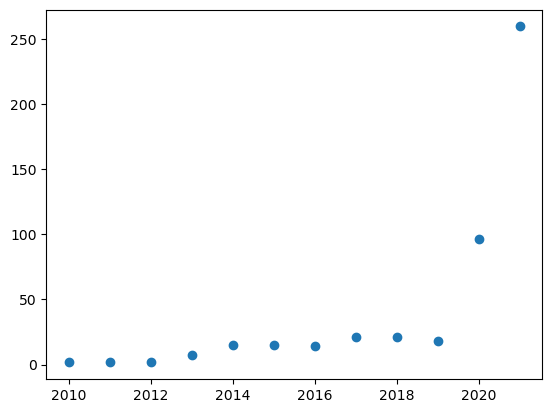

In [73]:
plt.scatter(dff['Year'],dff['Average_Close'])

In [32]:
groupby_stocks_avg=Summary_Stats_Stock.groupby("Ticker")["Average_Close"].mean()
groupby_stocks_avg.head()

Ticker
AAPL    42.688499
AMZN    53.284019
CSCO    32.249335
EBAY    29.952706
GOOG    43.465112
Name: Average_Close, dtype: float64

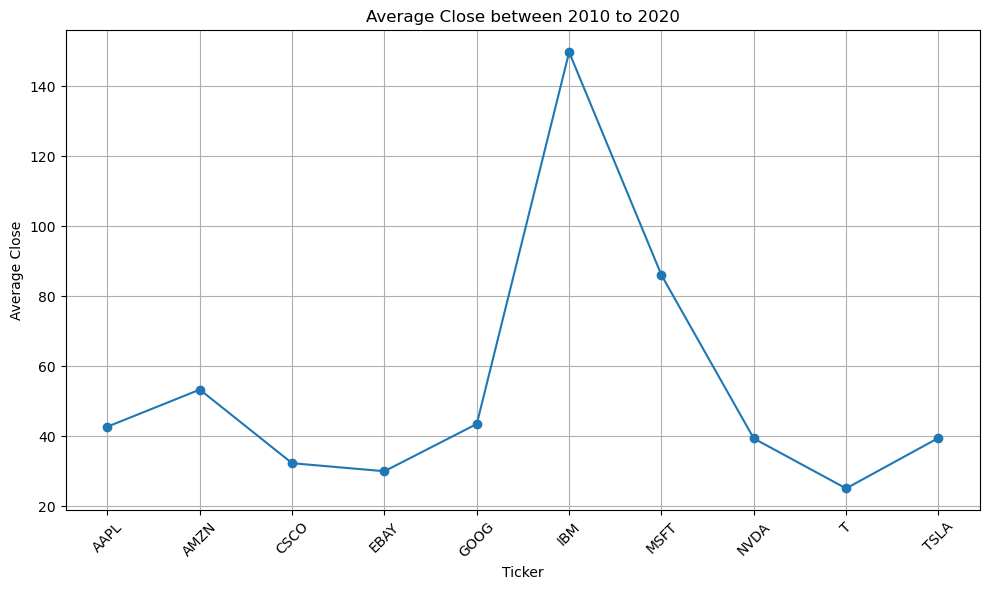

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
x = Summary_Stats_Stock["Ticker"].unique()
y = groupby_stocks_avg

plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.plot(x, y, marker='o', linestyle='-')
plt.xlabel("Ticker")
plt.ylabel("Average Close")
plt.title("Average Close between 2010 to 2020")
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()


In [99]:
Summary_Stats_Stock

,Ticker,Year,Average_Close,Median_Close,Variance_Close,StandardDev_Close,Minimum_Close,Maximum_Close,Stock_Listing,SEM
0,AAPL,2010,9.280088,9.180893,1.799091,1.341302,6.858929,11.623929,NASDAQ,0.084494
1,AAPL,2011,13.000154,12.750893,0.857201,0.925852,11.261429,15.080000,NASDAQ,0.058323
2,AAPL,2012,20.573204,20.803214,5.721816,2.392032,14.686786,25.075001,NASDAQ,0.151285
3,AAPL,2013,16.879817,16.466965,2.570043,1.603135,13.947500,20.360357,NASDAQ,0.100988
4,AAPL,2014,23.066164,23.475000,11.174467,3.342823,17.849285,29.750000,NASDAQ,0.210578
...,...,...,...,...,...,...,...,...,...,...
115,TSLA,2017,20.954420,21.170000,7.458840,2.731088,14.466000,25.666668,NASDAQ,0.172385
116,TSLA,2018,21.153995,21.257999,3.676223,1.917348,16.704000,25.304667,NASDAQ,0.121022
117,TSLA,2019,18.235347,17.353001,12.498708,3.535351,11.931333,28.729334,NASDAQ,0.222706
118,TSLA,2020,96.665689,80.577332,3173.279615,56.331870,24.081333,235.223328,NASDAQ,3.541554


In [102]:
data2_avg_by_q_df=stock_combined_df.copy()
data2_avg_by_q_df

,Date,Low,Open,Volume,High,Close,Adjusted Close,Ticker
0,1980-12-12,0.128348,0.128348,469033600,0.128906,0.128348,0.099874,AAPL
1,1980-12-15,0.121652,0.122210,175884800,0.122210,0.121652,0.094663,AAPL
2,1980-12-16,0.112723,0.113281,105728000,0.113281,0.112723,0.087715,AAPL
3,1980-12-17,0.115513,0.115513,86441600,0.116071,0.115513,0.089886,AAPL
4,1980-12-18,0.118862,0.118862,73449600,0.119420,0.118862,0.092492,AAPL
...,...,...,...,...,...,...,...,...
77615,2022-12-06,175.330002,181.220001,92150800,183.649994,179.820007,179.820007,TSLA
77616,2022-12-07,172.220001,175.029999,84213300,179.380005,174.039993,174.039993,TSLA
77617,2022-12-08,169.059998,172.199997,97624500,175.199997,173.440002,173.440002,TSLA
77618,2022-12-09,173.360001,173.839996,104746600,182.500000,179.050003,179.050003,TSLA


In [104]:
data2_avg_by_q_df['Date'] = pd.to_datetime(data2_avg_by_q_df['Date'])

data2_avg_by_q_df['Quarter']=data2_avg_by_q_df['Date'].dt.to_period('Q')
data2_avg_by_q_df

,Date,Low,Open,Volume,High,Close,Adjusted Close,Ticker,Quarter
0,1980-12-12,0.128348,0.128348,469033600,0.128906,0.128348,0.099874,AAPL,1980Q4
1,1980-12-15,0.121652,0.122210,175884800,0.122210,0.121652,0.094663,AAPL,1980Q4
2,1980-12-16,0.112723,0.113281,105728000,0.113281,0.112723,0.087715,AAPL,1980Q4
3,1980-12-17,0.115513,0.115513,86441600,0.116071,0.115513,0.089886,AAPL,1980Q4
4,1980-12-18,0.118862,0.118862,73449600,0.119420,0.118862,0.092492,AAPL,1980Q4
...,...,...,...,...,...,...,...,...,...
77615,2022-12-06,175.330002,181.220001,92150800,183.649994,179.820007,179.820007,TSLA,2022Q4
77616,2022-12-07,172.220001,175.029999,84213300,179.380005,174.039993,174.039993,TSLA,2022Q4
77617,2022-12-08,169.059998,172.199997,97624500,175.199997,173.440002,173.440002,TSLA,2022Q4
77618,2022-12-09,173.360001,173.839996,104746600,182.500000,179.050003,179.050003,TSLA,2022Q4


<Axes: title={'center': 'GOOG Average Close Price by Quarter'}, xlabel='Quarter', ylabel='Average Close Price USD'>

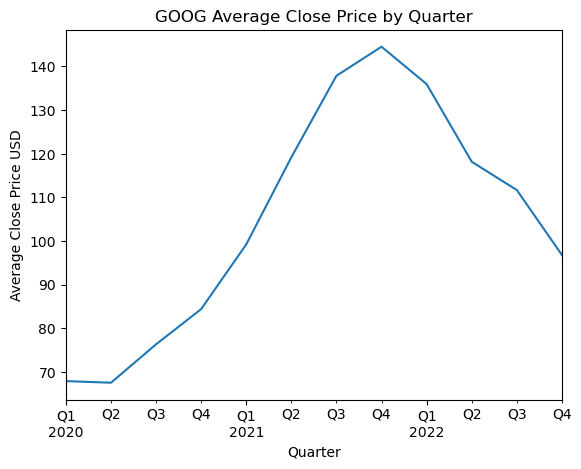

In [132]:
Google_Corl_df=data2_avg_by_q_df.loc[data2_avg_by_q_df["Ticker"]=="GOOG"]
Google_Corl_df= Google_Corl_df.loc[(Google_Corl_df["Date"] > "2019-12-31")]
Google_Corl_df1 = Google_Corl_df.groupby("Quarter")["Close"].mean().plot()
plt.ylabel("Average Close Price USD")
plt.title("GOOG Average Close Price by Quarter")
Google_Corl_df1

In [133]:
Google_Corl_df

,Date,Low,Open,Volume,High,Close,Adjusted Close,Ticker,Quarter
35261,2020-01-02,67.077499,67.077499,28132000,68.406998,68.368500,68.368500,GOOG,2020Q1
35262,2020-01-03,67.277199,67.392998,23728000,68.625000,68.032997,68.032997,GOOG,2020Q1
35263,2020-01-06,67.500000,67.500000,34646000,69.824997,69.710503,69.710503,GOOG,2020Q1
35264,2020-01-07,69.518997,69.897003,30054000,70.149498,69.667000,69.667000,GOOG,2020Q1
35265,2020-01-08,69.542000,69.603996,30560000,70.579002,70.216003,70.216003,GOOG,2020Q1
...,...,...,...,...,...,...,...,...,...
35999,2022-12-06,96.760002,99.669998,20877600,100.209999,97.309998,97.309998,GOOG,2022Q4
36000,2022-12-07,95.025002,96.769997,26647900,97.309998,95.150002,95.150002,GOOG,2022Q4
36001,2022-12-08,93.800003,95.690002,25593200,95.870003,93.949997,93.949997,GOOG,2022Q4
36002,2022-12-09,93.019997,93.900002,21873700,94.489998,93.070000,93.070000,GOOG,2022Q4
